#Project: EDA SP&500

*Neste projeto é feito um web scraping dos dados básicos de cadastro das empresas no SP&500 da página do Wikipédia, depois construída a base para a aplicação a ser exibida usando o Streamlit, bem como algumas funções helpers.*

## Parte I

*Usando os dados da Wikipédia*

In [1]:
#Função para fazer o web scraping dos dados da Wikipedia
import pandas as pd
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

A página apresenta duas tabelas de dados, mas para o propósito desta aplicação será utilizada somente a primeira (html[0]):

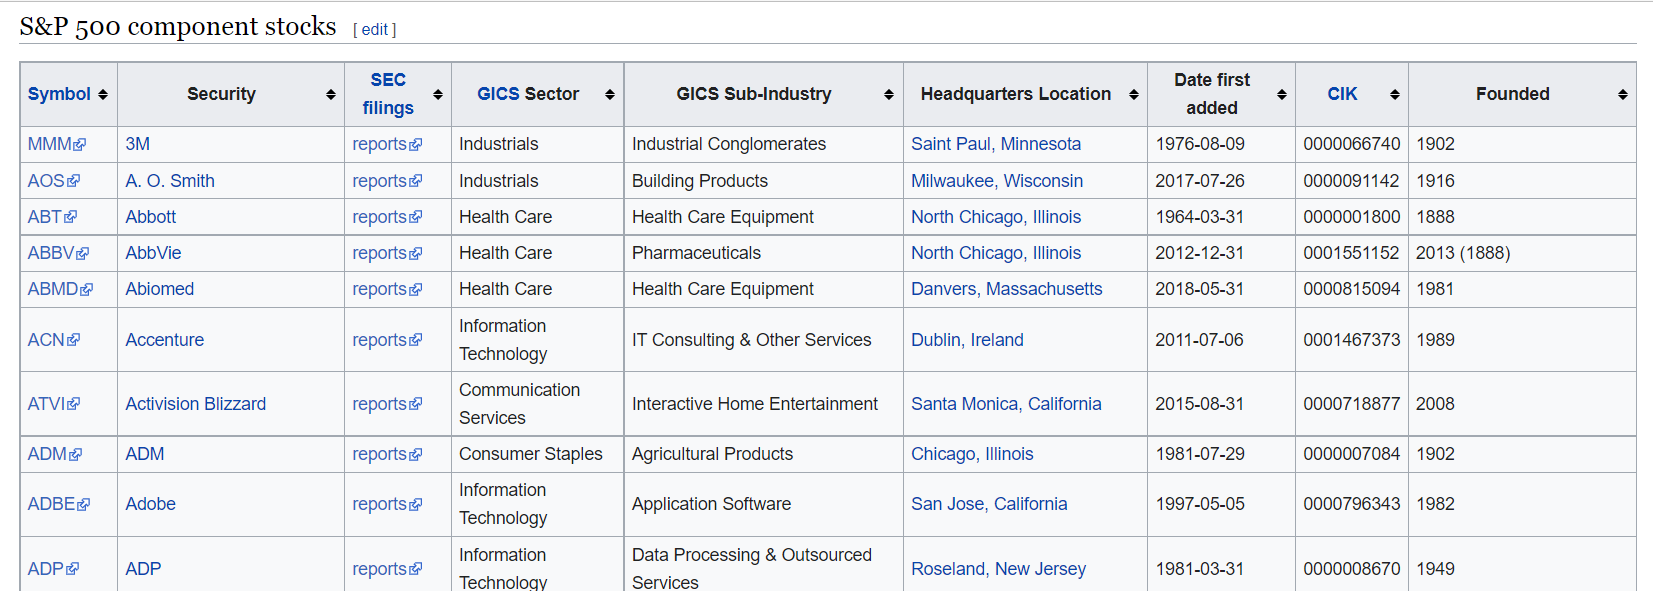

In [2]:
df = load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


**Analisando os setores**

*Examinando os dados de setor, na quarta coluna.*

In [3]:
sector_unique = df['GICS Sector'].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [4]:
#quantidade de setores diferentes
len(sector_unique)

11

Existem 11 setores diferentes:

Industrials, Health Care, Information Technology, Communication Services, Costumer Discretionary, Utilities, Financials, Materials, Real Estate, Consumer Staples e Energy.

**Agrupando as empresas por setor**

*Group by*

In [5]:
sector = df.groupby('GICS Sector')

In [6]:
sector.first()
#exibe a primeira empresa de cada setor

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,ADM,ADM,reports,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [8]:
sector.describe()
#informações estatíticas básicas de cada setor

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  27.0  1.107343e+06  516013.007250  18926.0  773272.50   
Consumer Discretionary  60.0  8.658420e+05  459208.678026  27419.0  759791.50   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  21.0  7.674384e+05  619023.796823   4447.0   93410.00   
Financials              66.0  6.369112e+05  537329.687765   4962.0   71386.25   
Health Care             65.0  8.220182e+05  527683.613634   1800.0  313616.00   
Industrials             73.0  6.736877e+05  585966.514840   4281.0   77360.00   
Information Technology  74.0  9.209406e+05  510697.316741   2488.0  754287.50   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             30.0  8.960744e+05  322166.034436  34903.0  807235.25   
Utilities               29.0  8.402204e+05  467422.045064   4904.0  731802.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1166691.0  1500907.50  1754301.0  
Consumer Discretionary   921249.0  1161339.25  1590895.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                   858470.0  1163165.00  1701605.0  
Financials               739974.5  1118437.00  1601712.0  
Health Care              879169.0  1099800.00  1821825.0  
Industrials              746515.0  1067701.00  1783180.0  
Information Technology   949462.5  1349367.25  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              918217.0  1052997.75  1393311.0  
Utilities                874761.0  1047862.00  1868275.0

**Analisando os dados por setor**

In [9]:
#selecionando, por exemplo, empresas do setor de Health Care:
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
13,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
20,ALGN,Align,reports,Health Care,Health Care Supplies,"San Jose, California",2017-06-19,1097149,1997
...,...,...,...,...,...,...,...,...,...
478,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
486,WAT,Waters,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
490,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


## Parte II

*Usando os dados da biblioteca do Yahoo Finanças*

**Dados Financeiros**

In [10]:
! pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 14.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
import yfinance as yf

**Listagem dos tickers da S&P500**

In [13]:
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL

**Recuperando dados de ações**

In [14]:
# https://pypi.org/project/yfinance/

data = yf.download(tickers = list(df.Symbol), period = 'ytd', interval = '1d',
                   group_by = 'ticker', auto_adjust = True, prepost = True, 
                   threads = True, proxy = None)

#períodos válidos: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
#intervalos válidos: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
#para os demais parâmetros, aconselha-se deixar default

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [15]:
data

NXPI                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2022-01-03  227.309184  232.265613  226.990706  230.125793  1519300   
2022-01-04  231.310160  233.788367  224.393053  231.767975  1965000   
2022-01-05  230.653293  233.171319  223.198733  223.507278  1963500   
2022-01-06  224.432858  227.677425  223.049437  225.885956  1957800   
2022-01-07  226.921026  228.901614  218.839458  220.282593  1760200   
...                ...         ...         ...         ...      ...   
2022-03-31  188.449997  189.279999  184.759995  185.080002  2627100   
2022-04-01  187.119995  187.119995  179.149994  182.020004  2417300   
2022-04-04  181.720001  184.750000  180.679993  182.610001  1844100   
2022-04-05  180.399994  181.179993  172.779999  175.070007  4234900   
2022-04-06  180.399994  172.039993  169.820007  170.110001   301876   

                   GM                                             ...  \
                 Open       High        Low      Close    Volume  ...   
Date                                                              ...   
2022-01-03  59.869999  61.570000  59.740002  61.169998  20980200  ...   
2022-01-04  61.959999  65.980003  61.959999  65.739998  44691300  ...   
2022-01-05  65.519997  67.209999  62.599998  62.740002  43578700  ...   
2022-01-06  63.169998  63.500000  61.669998  62.869999  20650900  ...   
2022-01-07  63.810001  63.910000  61.419998  62.270000  17136100  ...   
...               ...        ...        ...        ...       ...  ...   
2022-03-31  44.840000  44.900002  43.740002  43.740002  17335000  ...   
2022-04-01  44.160000  44.450001  42.410000  42.959999  16779200  ...   
2022-04-04  43.270000  43.419998  42.529999  43.180000  12593000  ...   
2022-04-05  42.959999  43.160000  41.320000  41.419998  19824300  ...   
2022-04-06  42.959999  41.330002  40.299999  41.160000   2033731  ...   

                  EMR                                                    DOV  \
                 Open        High        Low      Close   Volume        Open   
Date                                                                           
2022-01-03  92.811796   92.931164  90.583512  91.279854  2435900  181.055418   
2022-01-04  92.762051   95.766245  92.006026  95.328552  4466700  179.380836   
2022-01-05  96.552112   97.477246  95.059961  95.189285  4180000  181.414260   
2022-01-06  95.408138   96.383006  94.771480  95.726463  2477000  179.978896   
2022-01-07  96.044786   96.462586  95.109702  95.189285  2863600  181.842870   
...               ...         ...        ...        ...      ...         ...   
2022-03-31  98.790001  100.000000  98.000000  98.050003  2786700  160.029999   
2022-04-01  99.080002   99.379997  97.709999  98.419998  2413900  158.339996   
2022-04-04  98.080002   98.699997  97.150002  98.300003  2633400  157.460007   
2022-04-05  98.209999   98.589996  96.139999  96.559998  2741900  157.949997   
2022-04-06  98.209999   95.970001  94.839996  95.720001   282433  152.000000   

                                                         
                  High         Low       Close   Volume  
Date                                                     
2022-01-03  183.128725  176.719412  177.756073   786100  
2022-01-04  182.411046  179.021994  180.885971   808600  
2022-01-05  182.261531  178.403975  178.762817   758800  
2022-01-06  182.311362  179.261212  180.885971   752800  
2022-01-07  183.457667  180.636773  182.331299  1057500  
...                ...         ...         ...      ...  
2022-03-31  160.619995  156.830002  156.899994   756500  
2022-04-01  159.449997  156.970001  158.550003   637000  
2022-04-04  158.570007  155.740005  157.929993   817300  
2022-04-05  159.020004  153.369995  153.919998   867900  
2022-04-06  153.270004  151.020004  152.824997    79920  

[66 rows x 2527 columns]

**Analisando dados por empresa**

*Cria um subset de dados, de acordo com o ticker da empresa*

In [16]:
data['ABT']

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,138.939913,139.338517,136.727730,138.551285,6688100
2022-01-04,139.009686,139.159153,134.286341,135.292801,8241200
2022-01-05,134.674962,136.548359,134.595257,134.684937,5948200
2022-01-06,134.525501,135.731255,133.409443,134.665009,5710200
2022-01-07,134.405924,135.701343,133.907681,135.083527,4367500
...,...,...,...,...,...
2022-03-31,120.209999,120.489998,118.099998,118.360001,5432600
2022-04-01,118.839996,118.970001,117.260002,118.580002,4314000
2022-04-04,117.870003,118.980003,117.570000,118.879997,4037200


In [17]:
#mudando a data para ser uma das colunas
#cria um novo dataframe contendo a data e o preço de fechamento para construção do gráfico
df2 = pd.DataFrame(data['ABT'].Close)
df2['Date'] = df2.index
df2

,Close,Date
Date,,
2022-01-03,138.551285,2022-01-03
2022-01-04,135.292801,2022-01-04
2022-01-05,134.684937,2022-01-05
2022-01-06,134.665009,2022-01-06
2022-01-07,135.083527,2022-01-07
...,...,...
2022-03-31,118.360001,2022-03-31
2022-04-01,118.580002,2022-04-01
2022-04-04,118.879997,2022-04-04


**Plotando o gráfico do preço de fechamento**

*Pelo ticker da empresa*

Text(0, 0.5, 'Preço de Fechamento')

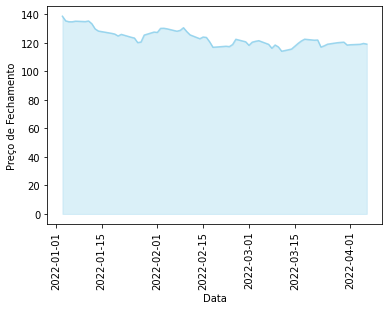

In [18]:
import matplotlib.pyplot as plt
plt.fill_between(df2.Date, df2.Close, color="skyblue", alpha=0.3)
plt.plot(df2.Date, df2.Close, color="skyblue", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")

Construindo uma função customizada para plotar o gráfico dos preços de fechamento de qualquer empresa, apenas passando o ticker como parâmetro:

In [21]:
import matplotlib.pyplot as plt

def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date']=df.index
  plt.fill_between(df.Date, df.Close, color="skyblue", alpha=0.3)
  plt.plot(df.Date, df.Close, color="skyblue", alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Data', fontweight='bold')
  plt.ylabel("Preço de Fechamento", fontweight='bold')
  return plt.show()

Testando a função...

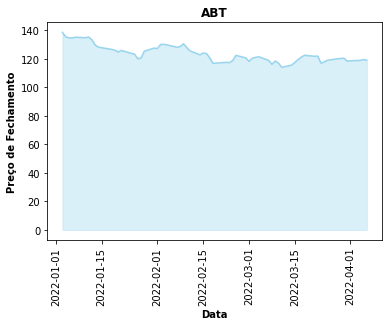

In [22]:
price_plot('ABT')

Passando as 10 primeiras empresas pelo seu ticker para a função para plotar os gráficos de preço de fechamento:

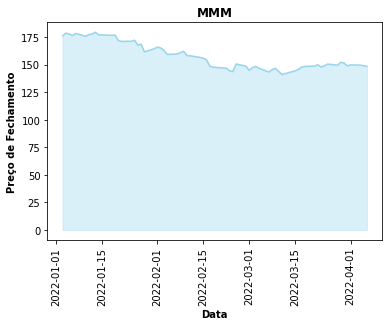

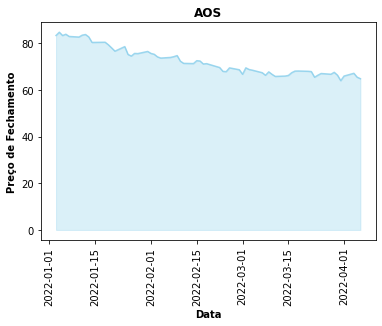

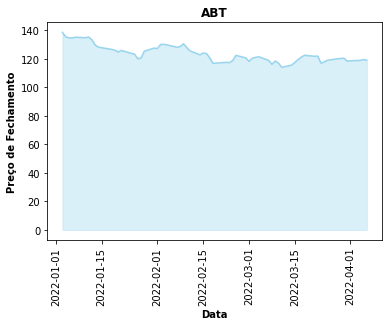

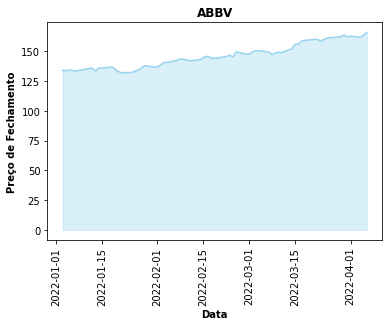

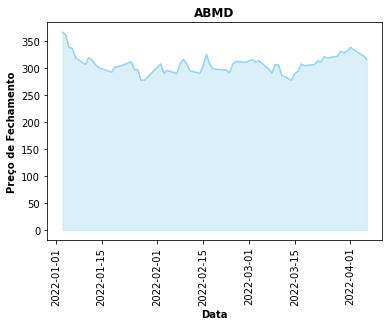

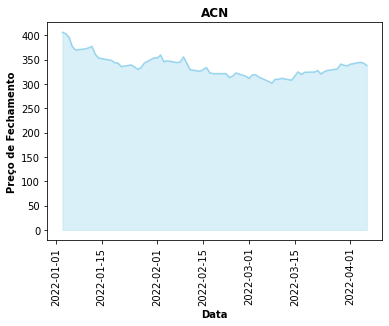

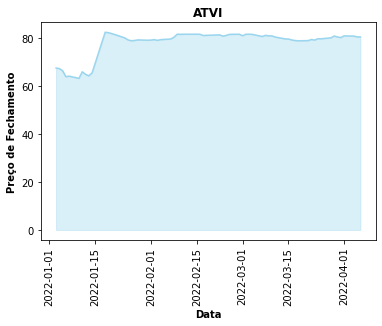

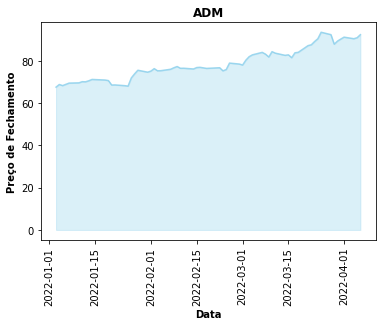

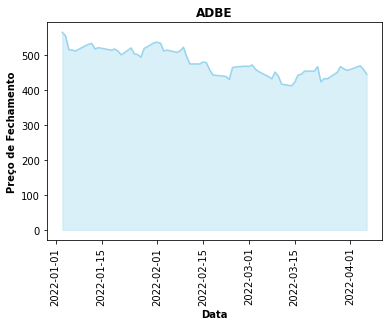

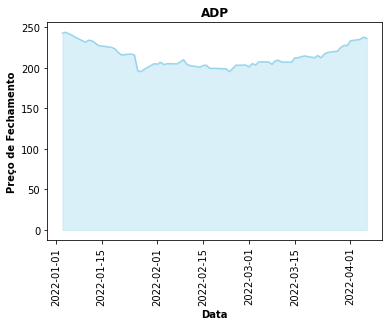

In [23]:
#Plota os 10 gráficos
for i in list(df.Symbol)[:10]:
  price_plot(i)